Shape of CSV: (1971, 5)

Columns: ['filenames', 'TSS_brix', 'Firmness', 'Titerabile acid percentage', 'Volume']

Data types:
 filenames                      object
TSS_brix                      float64
Firmness                      float64
Titerabile acid percentage    float64
Volume                        float64
dtype: object

First 5 rows:
   filenames  TSS_brix  Firmness  Titerabile acid percentage  Volume
0   10a.jpg    0.7059    0.3429                      0.3438  0.3448
1   10b.jpg    0.7059    0.3429                      0.3438  0.3448
2   10c.jpg    0.7059    0.3429                      0.3438  0.3448
3   10d.jpg    0.7059    0.3429                      0.3438  0.3448
4   10e.jpg    0.7059    0.3429                      0.3438  0.3448

Missing values per column:
 filenames                     0
TSS_brix                      0
Firmness                      0
Titerabile acid percentage    0
Volume                        0
dtype: int64

Descriptive statistics:
           TSS_brix

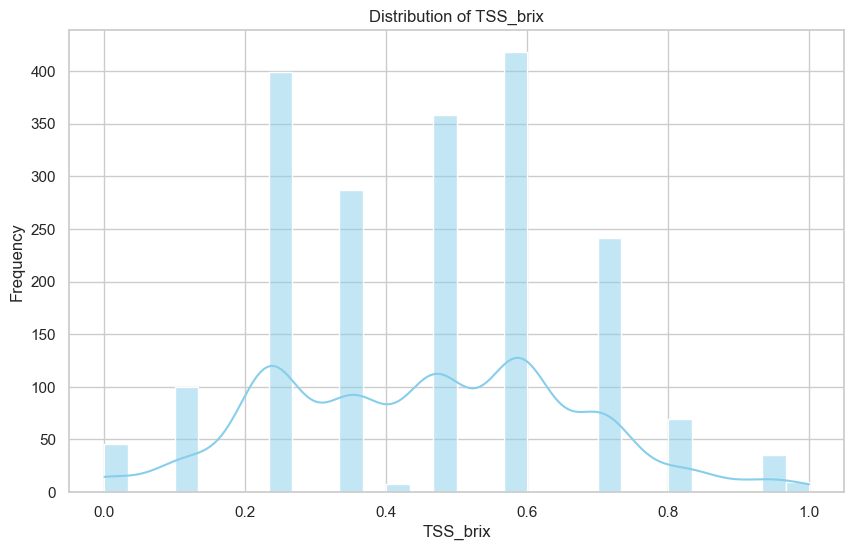

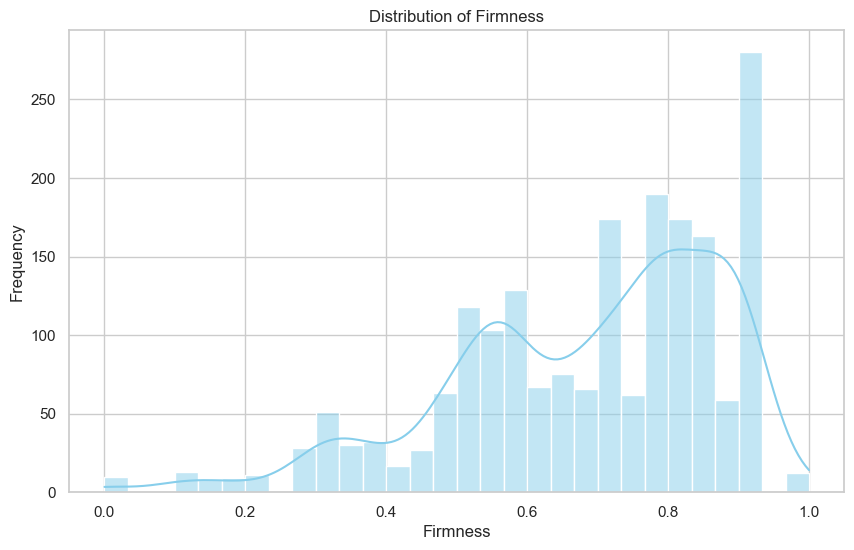

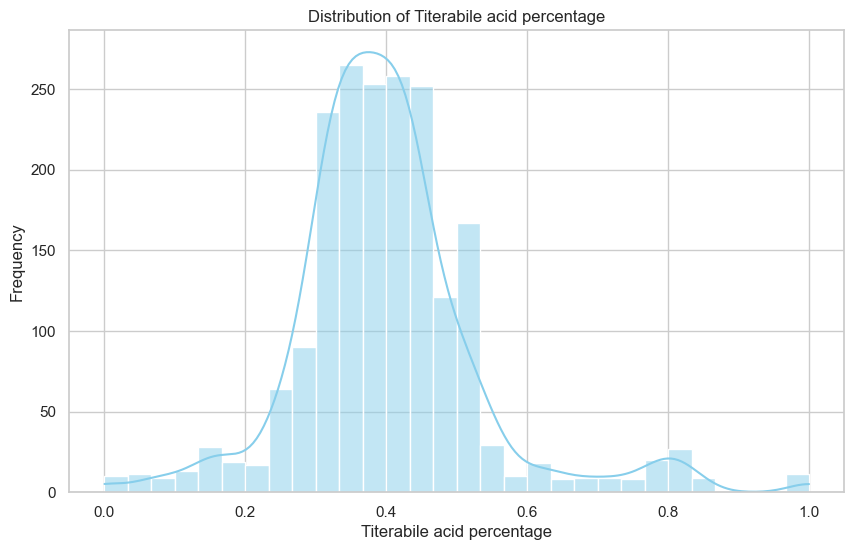

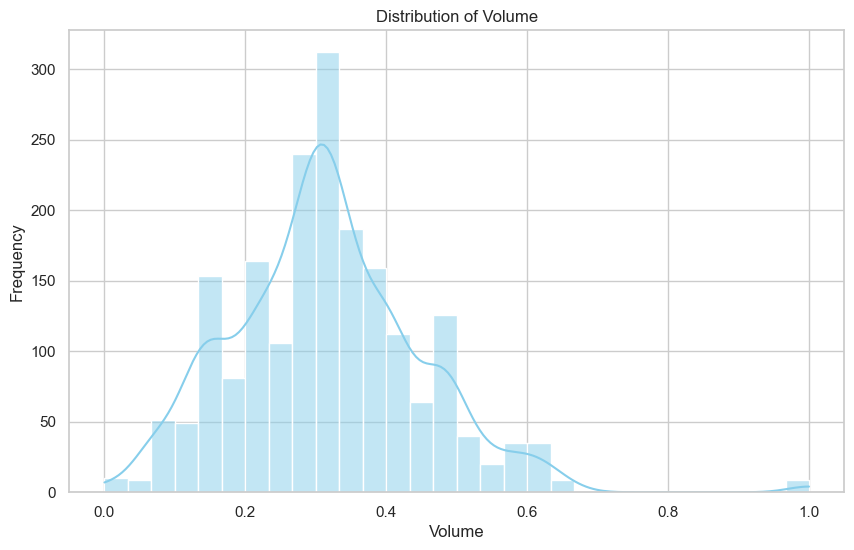

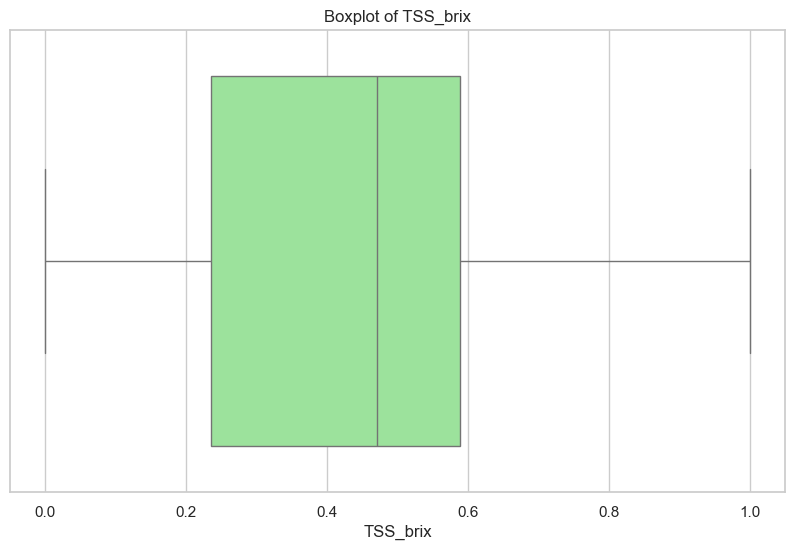

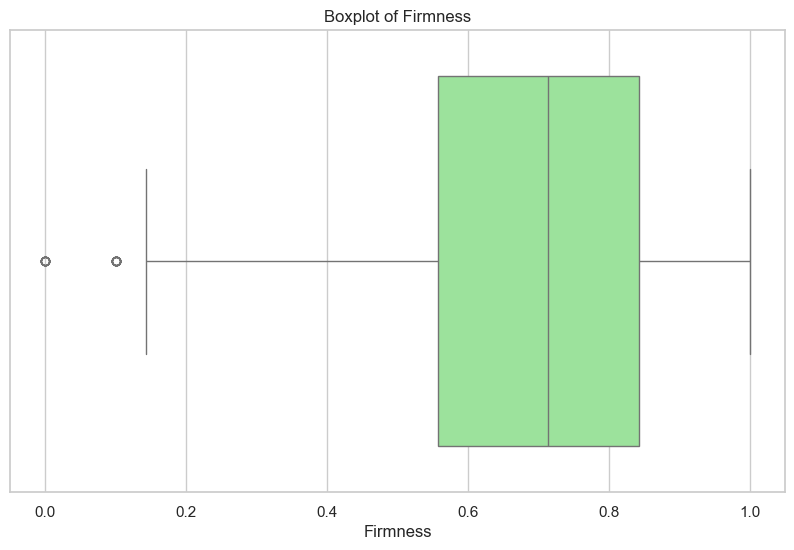

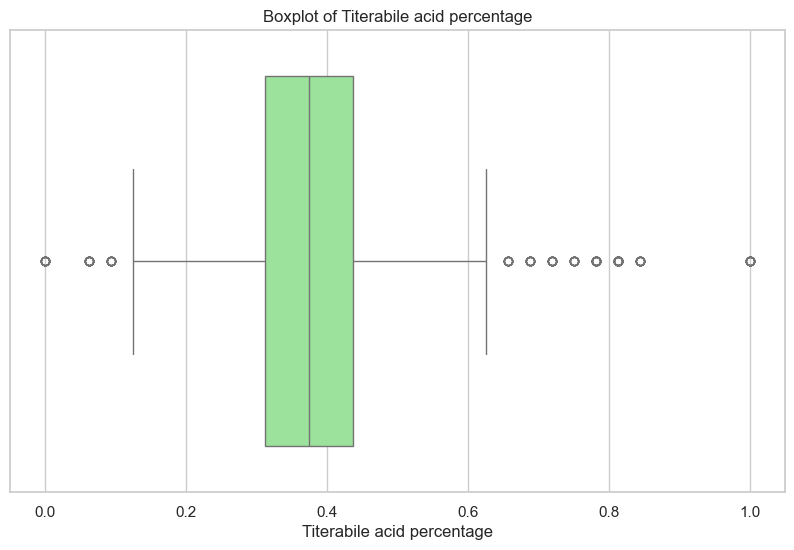

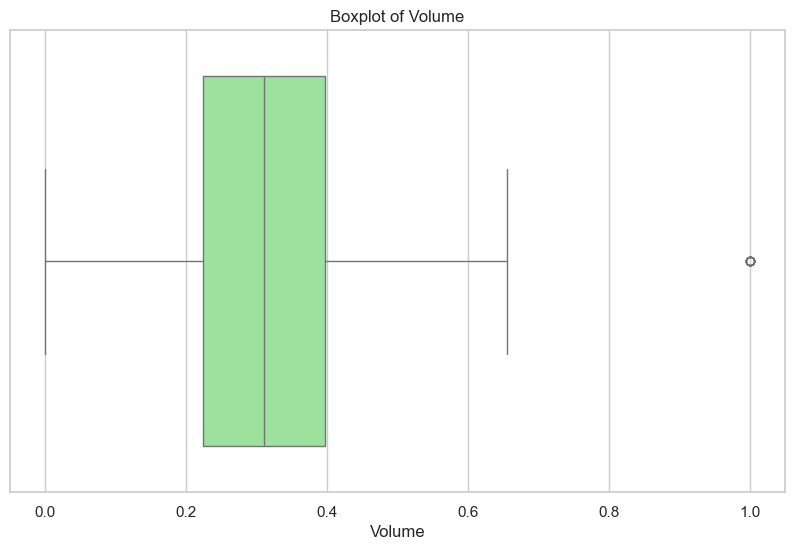


Correlation matrix:
                             TSS_brix  Firmness  Titerabile acid percentage  \
TSS_brix                    1.000000 -0.200486                    0.017945   
Firmness                   -0.200486  1.000000                    0.114740   
Titerabile acid percentage  0.017945  0.114740                    1.000000   
Volume                      0.098441 -0.150872                    0.113348   

                              Volume  
TSS_brix                    0.098441  
Firmness                   -0.150872  
Titerabile acid percentage  0.113348  
Volume                      1.000000  


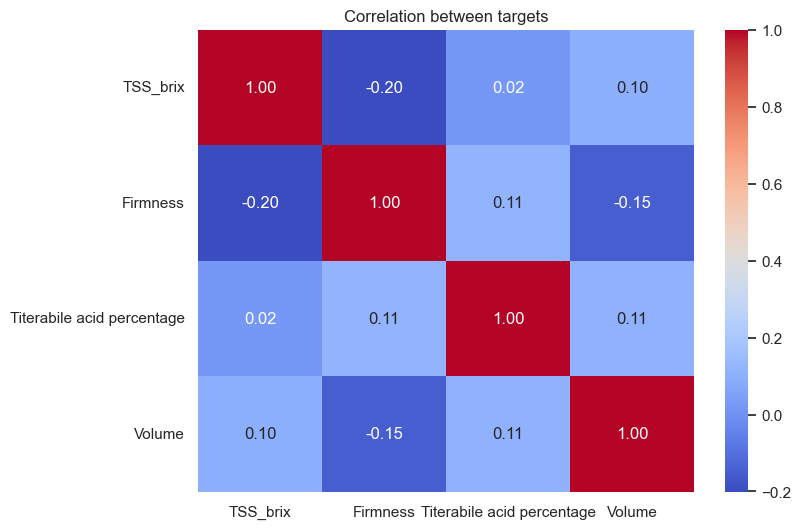

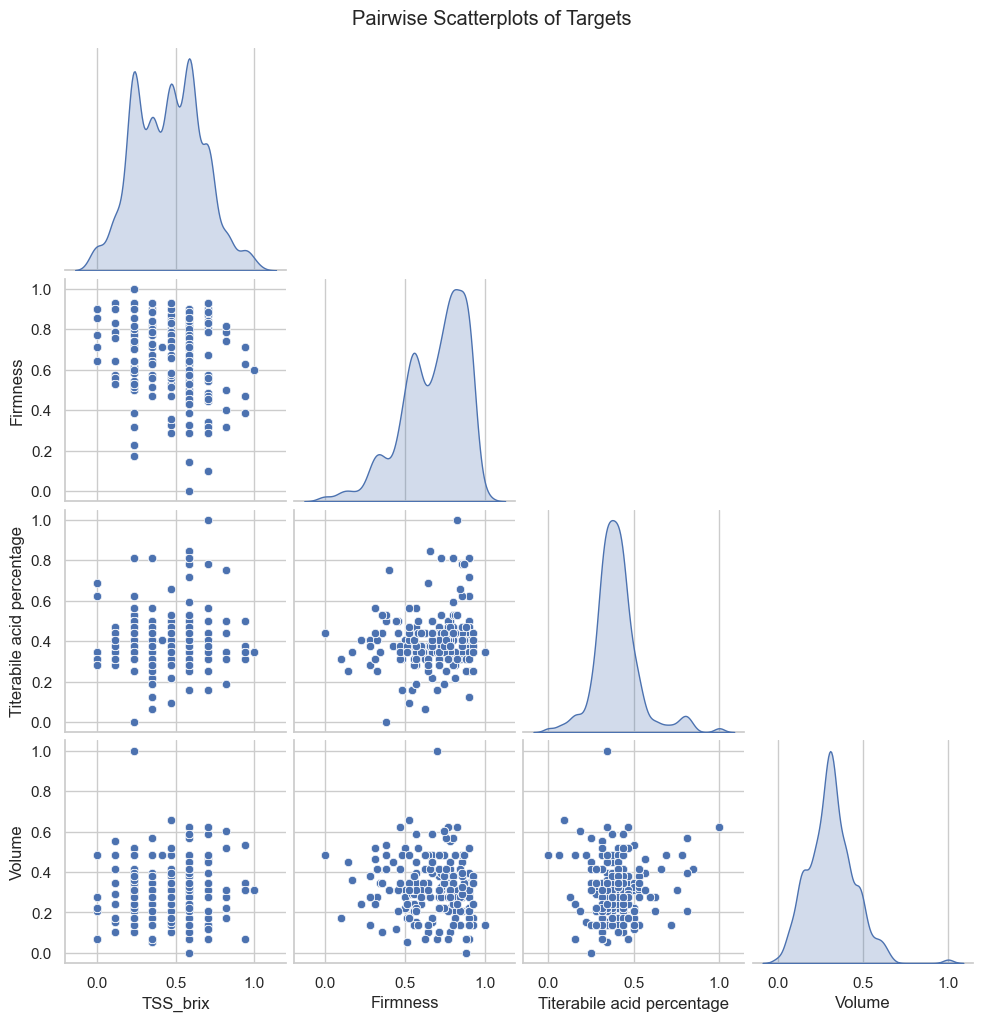

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [3]:
# ============================================
# Notebook: Enhanced Exploratory Analysis of Labels CSV
# ============================================

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# 2. Load CSV
csv_path = "AppleV_intrinsic.csv"  # <-- change this to your CSV file path
df = pd.read_csv(csv_path)

# 3. Inspect data
print("Shape of CSV:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 4. Missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 5. Descriptive statistics for numeric columns
numeric_cols = ['TSS_brix', 'Firmness', 'Titerabile acid percentage', 'Volume']
print("\nDescriptive statistics:\n", df[numeric_cols].describe())

# 6. Distribution plots for each target
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 7. Boxplots for detecting outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# 8. Pairwise correlation analysis
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between targets")
plt.show()

# 9. Scatterplot matrix (pairplot)
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Scatterplots of Targets", y=1.02)
plt.show()

# 10. Interactive scatterplots using Plotly
for i, col_x in enumerate(numeric_cols):
    for j, col_y in enumerate(numeric_cols):
        if i < j:
            fig = px.scatter(df, x=col_x, y=col_y, color=col_y,
                             title=f"Interactive Scatterplot: {col_x} vs {col_y}",
                             labels={col_x: col_x, col_y: col_y},
                             opacity=0.7)
            fig.show()

# 11. Outlier detection using IQR method
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

for col in numeric_cols:
    outliers = detect_outliers(df, col)
    print(f"{col} has {len(outliers)} outliers.")

# 12. Optional: save summary statistics to CSV
summary_stats = df[numeric_cols].describe().transpose()
summary_stats['outliers_count'] = [len(detect_outliers(df, col)) for col in numeric_cols]
summary_stats.to_csv("labels_summary_statistics.csv", index=True)
print("\nSummary statistics saved to 'labels_summary_statistics.csv'")

# 13. Optional: filename length and distribution (for additional insight)
df['filename_length'] = df['filenames'].apply(lambda x: len(str(x)))
plt.figure()
sns.histplot(df['filename_length'], bins=30, kde=True)
plt.title("Distribution of Filename Lengths")
plt.show()


In [2]:
pip install seaborn plotly

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 859.3 kB/s  0:00:13 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [seaborn]m1/3 [plotly]
Note: you may need to restart the kernel to use updated packages.
